# Datenanalyse Teil III - Visualisierungen

### Natalie Widmann




Wintersemester 2024 / 2025


Universität Leipzig





### Ziel

- Grundlagen der Datenvisualisierungen
- 


![Datenpipeline](../../imgs/datapipeline.png)

In [17]:
# Install a pip package im Jupyter Notebook
!pip3 install pandas

In [4]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

data_url = "https://data.humdata.org/dataset/74163686-a029-4e27-8fbf-c5bfcd13f953/resource/c5ce40d6-07b1-4f36-955a-d6196436ff6b/download/emdat-country-profiles_2024_12_02.xlsx"
data = pd.read_excel(data_url, engine="openpyxl")
data

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,#date +occurred,#country +name,#country +code,#cause +group,#cause +subgroup,#cause +type,#cause +subtype,#frequency,#affected +ind,#affected +ind +killed,NaN,#value +usd,NaN
1,2000,Afghanistan,AFG,Natural,Climatological,Drought,Drought,1,2580000,37,50000.00,88473,56.51
2,2000,Algeria,DZA,Natural,Hydrological,Flood,Flash flood,1,100,28,NaN,NaN,56.51
3,2000,Algeria,DZA,Natural,Meteorological,Storm,Storm (General),1,10,4,NaN,NaN,56.51
4,2000,Angola,AGO,Natural,Hydrological,Flood,Flood (General),3,9011,15,NaN,NaN,56.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,2024,Viet Nam,VNM,Natural,Meteorological,Storm,Tropical cyclone,3,3747257,354,2000000000.00,NaN,NaN
6142,2024,Yemen,YEM,Natural,Hydrological,Flood,Flash flood,1,1075,40,NaN,NaN,NaN
6143,2024,Yemen,YEM,Natural,Hydrological,Flood,Flood (General),2,210439,62,NaN,NaN,NaN
6144,2024,Zambia,ZMB,Natural,Climatological,Drought,Drought,1,6600000,NaN,NaN,NaN,NaN


In [19]:
# Data Cleaning
data = data.drop(index=0)

cols = ['Year', 'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, adjusted)']
for col in cols:
    data[col] = pd.to_numeric(data[col])


cols = ['ISO', 'Disaster Group', 'Total Damage (USD, adjusted)', 'CPI']
data.drop(cols, axis=1, inplace=True)

In [20]:
data

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)"
1,2000,Afghanistan,Climatological,Drought,Drought,1,2580000.00,37.00,50000.00
2,2000,Algeria,Hydrological,Flood,Flash flood,1,100.00,28.00,NaN
3,2000,Algeria,Meteorological,Storm,Storm (General),1,10.00,4.00,NaN
4,2000,Angola,Hydrological,Flood,Flood (General),3,9011.00,15.00,NaN
5,2000,Angola,Hydrological,Flood,Riverine flood,1,70000.00,31.00,10000000.00
...,...,...,...,...,...,...,...,...,...
6126,2024,Viet Nam,Meteorological,Storm,Tropical cyclone,3,3747257.00,354.00,2000000000.00
6127,2024,Yemen,Hydrological,Flood,Flash flood,1,1075.00,40.00,NaN
6128,2024,Yemen,Hydrological,Flood,Flood (General),2,210439.00,62.00,NaN
6129,2024,Zambia,Climatological,Drought,Drought,1,6600000.00,NaN,NaN


## Visualisierungen

#### Karte

In [1]:
summary = data.groupby('Country')['Total Events'].sum().reset_index()
summary.head()

NameError: name 'data' is not defined

In [3]:
import plotly.express as px

fig = px.choropleth(
    summary,
    locations="Country",
    locationmode="country names",
    color="Total Events",
    title="Values by Country",
    color_continuous_scale=px.colors.sequential.Plasma
)

# Increase figure size
fig.update_layout(
    width=1000,  
    height=800 
)

fig.show()

NameError: name 'summary' is not defined

## Recherchefragen

- Wie viele Todesopfer gibt es in einem Land?
- Wie stark ist ein Land von Naturkatastrophen betroffen?
- Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen daran?
- Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

### Wie viele Todesopfer gibt es in einem Land?

#### Wie viele Todesopfer gibt es insgesamt?

In [21]:
data["Total Deaths"].sum()

1484617.0

#### Wie viele Todesopfer gibt es insgesamt in Deutschland?

In [23]:
data[data['Country'] == 'Germany']

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)"
365,2001,Germany,Meteorological,Storm,Lightning/Thunderstorms,1,NaN,6.00,300000000.00
626,2002,Germany,Hydrological,Flood,Flood (General),1,330108.00,27.00,11600000000.00
627,2002,Germany,Meteorological,Storm,Extra-tropical storm,1,NaN,11.00,1800000000.00
628,2002,Germany,Meteorological,Storm,Storm (General),2,19.00,11.00,250000000.00
915,2003,Germany,Meteorological,Extreme temperature,Heat wave,1,NaN,9355.00,1650000000.00
916,2003,Germany,Meteorological,Storm,Extra-tropical storm,1,NaN,5.00,300000000.00
917,2003,Germany,Meteorological,Storm,Lightning/Thunderstorms,1,NaN,10.00,NaN
1148,2004,Germany,Geophysical,Earthquake,Ground movement,1,150.00,NaN,12000000.00
1149,2004,Germany,Meteorological,Storm,Storm (General),1,NaN,2.00,130000000.00
1417,2005,Germany,Hydrological,Flood,Riverine flood,2,450.00,1.00,220000000.00


In [24]:
data[data['Country'] == 'Germany']['Total Deaths'].sum()

24351.0

In [25]:
data_germany = data[data['Country'] == 'Germany']
data_germany['Total Deaths'].sum()

24351.0

#### Wie viele Todesopfer gab es insgesamt in Indien?

In [27]:
data_land = data[data['Country'] == 'India']
data_land['Total Deaths'].sum()

88881.0

### Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen in Deutschland?

In [28]:
germany_data = data[data['Country'] == 'Germany']
germany_data['Disaster Type'].value_counts(normalize=True)

Disaster Type
Storm                 0.57
Flood                 0.21
Extreme temperature   0.21
Earthquake            0.02
Name: proportion, dtype: float64

# Visualisierung von DataFrames

[Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Matplotlib makes easy things easy and hard things possible.

Install matplotlib:

In [29]:
!pip3 install --upgrade pip
!pip3 install --upgrade Pillow
!pip3 install matplotlib

import matplotlib.pyplot as plt

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 4.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires pillow<11,>=7.1.0, but you have pillow 11.0.0 which is incompatible.


In [30]:
germany_data = data[data['Country'] == 'Germany']

In [33]:
germany_data['Disaster Type'].value_counts()

Disaster Type
Storm                  30
Flood                  11
Extreme temperature    11
Earthquake              1
Name: count, dtype: int64

<Axes: xlabel='Disaster Type'>

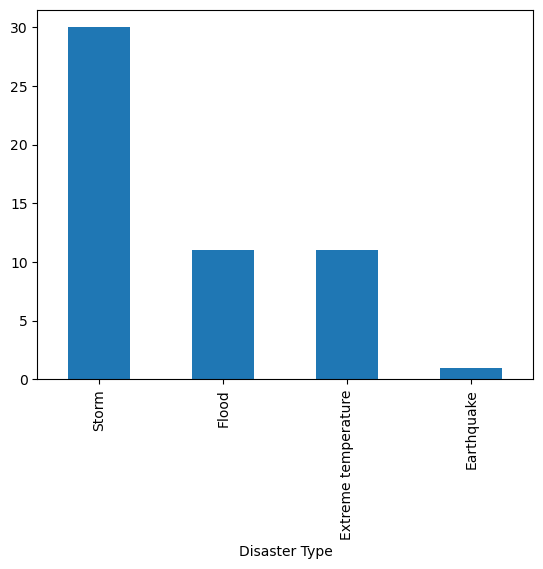

In [34]:
germany_data['Disaster Type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

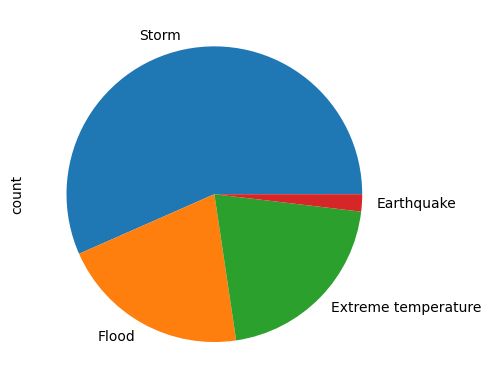

In [35]:
germany_data['Disaster Type'].value_counts().plot(kind='pie')

In [64]:
import seaborn as sns

# Sample data
data = {'Year': [2015, 2016, 2017, 2018, 2019], 'Sales': [200, 300, 400, 350, 500]}
df = pd.DataFrame(data)

# Line plot
sns.lineplot(data=germany_data, x='Year', y='Sales')
plt.title('Sales Over Time')
plt.show()

ValueError: Could not interpret value `Sales` for parameter `y`

## Recherchefragen

#### Welche Naturkatastrophen fordern die meisten Todesopfer?

`.groupby()` gruppiert einen DataFrame nach den Werten einer oder mehreren Spalten.

Die Spalten nach denen man Gruppieren möchte werden als Argument übergeben. Danach folgt die gewünschte Berechnung auf dieser Gruppe. Das Ergebnis wird als DataFrame zurückgegeben. 

In [36]:
data

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)"
1,2000,Afghanistan,Climatological,Drought,Drought,1,2580000.00,37.00,50000.00
2,2000,Algeria,Hydrological,Flood,Flash flood,1,100.00,28.00,NaN
3,2000,Algeria,Meteorological,Storm,Storm (General),1,10.00,4.00,NaN
4,2000,Angola,Hydrological,Flood,Flood (General),3,9011.00,15.00,NaN
5,2000,Angola,Hydrological,Flood,Riverine flood,1,70000.00,31.00,10000000.00
...,...,...,...,...,...,...,...,...,...
6126,2024,Viet Nam,Meteorological,Storm,Tropical cyclone,3,3747257.00,354.00,2000000000.00
6127,2024,Yemen,Hydrological,Flood,Flash flood,1,1075.00,40.00,NaN
6128,2024,Yemen,Hydrological,Flood,Flood (General),2,210439.00,62.00,NaN
6129,2024,Zambia,Climatological,Drought,Drought,1,6600000.00,NaN,NaN


In [37]:
data['Total Deaths'].sum()

1484617.0

In [38]:
data.groupby('Disaster Type')['Total Deaths'].sum()

Disaster Type
Animal incident                   12.00
Drought                        24160.00
Earthquake                    790639.00
Extreme temperature           285797.00
Flood                         135661.00
Glacial lake outburst flood      439.00
Impact                             0.00
Infestation                        0.00
Mass movement (dry)              382.00
Mass movement (wet)            20632.00
Storm                         222670.00
Volcanic activity               1744.00
Wildfire                        2481.00
Name: Total Deaths, dtype: float64

`.groupby()` kann auch auf mehrere Spalten gleichzeitig angewendet werden

In [39]:
data.groupby(['Disaster Type', 'Disaster Subtype'])['Total Deaths'].sum()

Disaster Type                Disaster Subtype                
Animal incident              Animal incident                        12.00
Drought                      Drought                             24160.00
Earthquake                   Ground movement                    537909.00
                             Tsunami                            252730.00
Extreme temperature          Cold wave                           12616.00
                             Heat wave                          269501.00
                             Severe winter conditions             3680.00
Flood                        Coastal flood                         602.00
                             Flash flood                         25891.00
                             Flood (General)                     39295.00
                             Riverine flood                      69873.00
Glacial lake outburst flood  Glacial lake outburst flood           439.00
Impact                       Collision            

### Visualisierung

<Axes: ylabel='Total Deaths'>

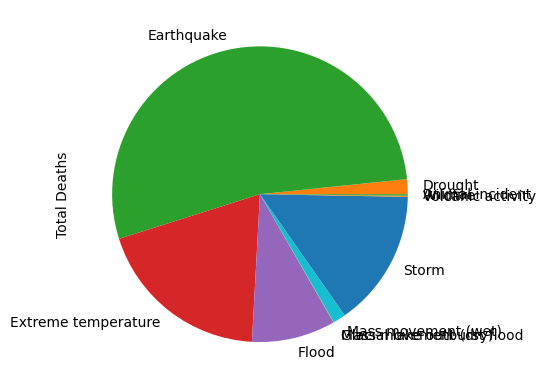

In [41]:
data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

#### Welche Naturkatastrophen fordern die meisten Todesopfer in Deutschland?

<Axes: ylabel='Total Deaths'>

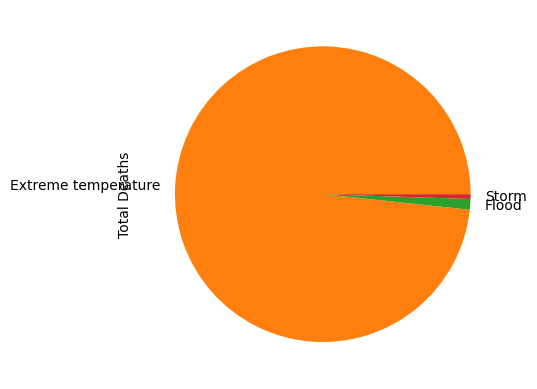

In [42]:
germany_data = data[data['Country'] == 'Germany']
germany_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

#### Generelle Funktion

<Axes: ylabel='Total Deaths'>

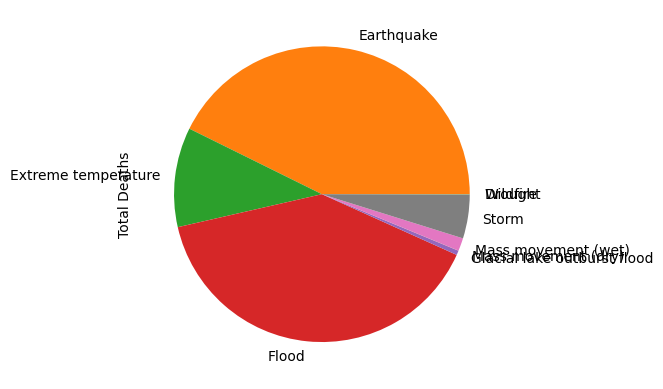

In [43]:
country = 'India'
country_data = data[data['Country'] == country]
country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

In [44]:
def plot_death_by_disastertype(data, country):
    country_data = data[data['Country'] == country]
    country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

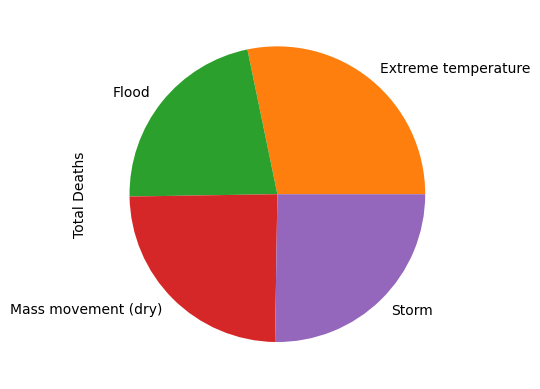

In [45]:
plot_death_by_disastertype(data, 'Egypt')

#### Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

**Berechne für jedes Jahr die Summe aus allen `Events`**

In [46]:
data.groupby('Year')['Total Events'].sum()

Year
2000    402
2001    372
2002    414
2003    358
2004    359
2005    429
2006    402
2007    410
2008    351
2009    344
2010    394
2011    329
2012    347
2013    330
2014    322
2015    386
2016    324
2017    344
2018    317
2019    400
2020    399
2021    433
2022    418
2023    437
2024    309
Name: Total Events, dtype: int64

In [47]:
data['Total Events'].sum()

9330

<Axes: title={'center': 'Anzahl an Naturkatastrophen pro Jahr'}, xlabel='Year'>

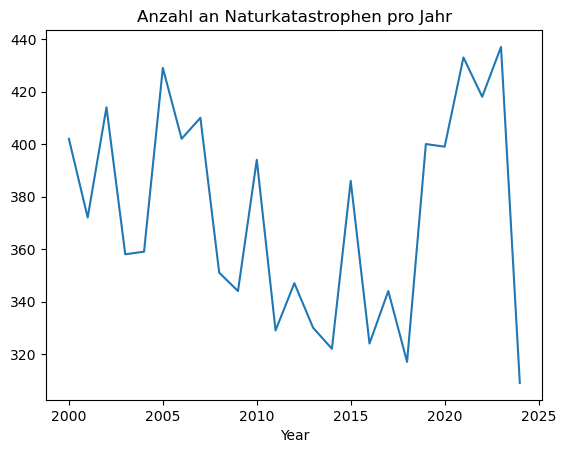

In [51]:
yearly_events = data.groupby('Year')['Total Events'].sum()
yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')

**Plotte für Deutschland die Entwicklung der Anzahl an Naturkatastrophen über die Jahre hinweg**

<Axes: title={'center': 'Anzahl an Naturkatastrophen pro Jahr'}, xlabel='Year'>

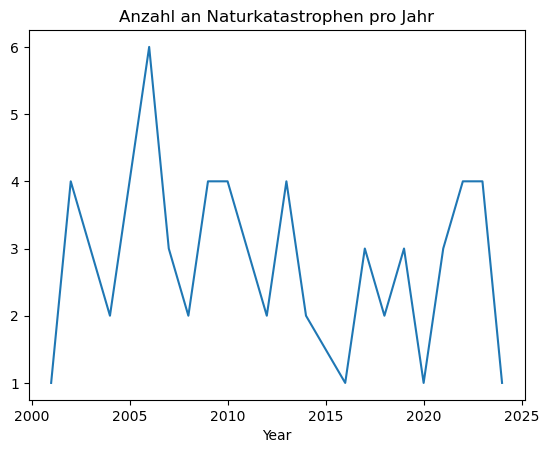

In [52]:
yearly_events =germany_data.groupby('Year')['Total Events'].sum()
yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')

## Länderdashboard

In [53]:
def plot_pie(country_data):
    country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie', title='Anteil an getöten Menschen nach Naturkatastrophentyp')
    plt.show()

In [54]:
def plot_time_evolution(country_data):
    yearly_events = country_data.groupby('Year')['Total Events'].sum()
    yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')
    plt.show()

In [55]:
def death_overview(country_data):
    total_deaths = country_data["Total Deaths"].sum()
    print(f'Getötete Menschen seit 1900: {total_deaths:,.0f}')

In [56]:
def compute_anteil(country_total, world_total):
    anteil = round(country_total / (world_total / 100.0), 2)
    print(f'{anteil}% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.')

In [57]:
def analyze(data, country):
    print(f'Naturkatastrophen in {country.upper()} \n')
    country_data = data[data['Country'] == country]
    
    # compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    text = death_overview(country_data)
    plot_pie(country_data)
    plot_time_evolution(country_data)

Naturkatastrophen in BANGLADESH 

Getötete Menschen seit 1900: 11,716


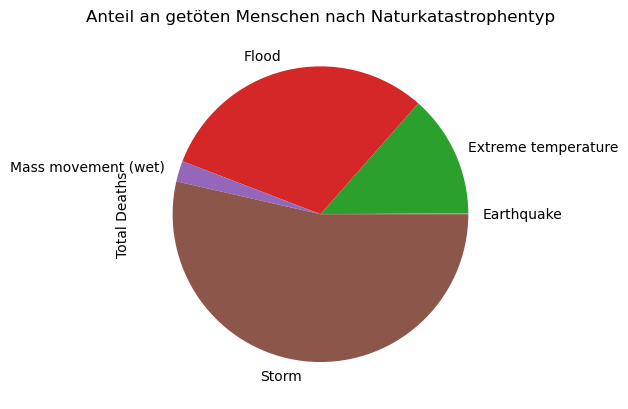

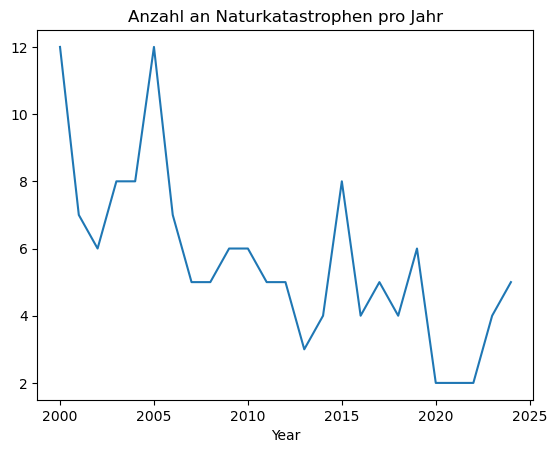

In [58]:
analyze(data, 'Bangladesh')

### Überblick über die Welt

Wie können wir die selbstdefinierte Funktion `analyze()` anpassen, so dass auch eine Gesamtstatistik, die alle Länder der Welt enthält abgefragt werden kann?

In [59]:
def analyze(data, country):
    print(f'Naturkatastrophen in {country.upper()} \n')
    country_data = data[data['Country'] == country]
    if country == 'world':
        country_data = data   
    compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    death_overview(country_data)
    plot_pie(country_data)
    plot_time_evolution(country_data)

Naturkatastrophen in WORLD 

100.0% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.
Getötete Menschen seit 1900: 1,484,617


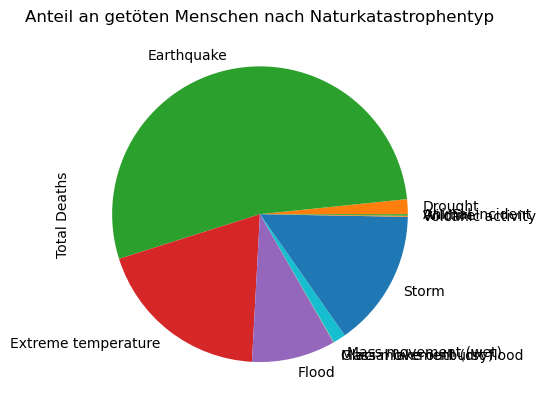

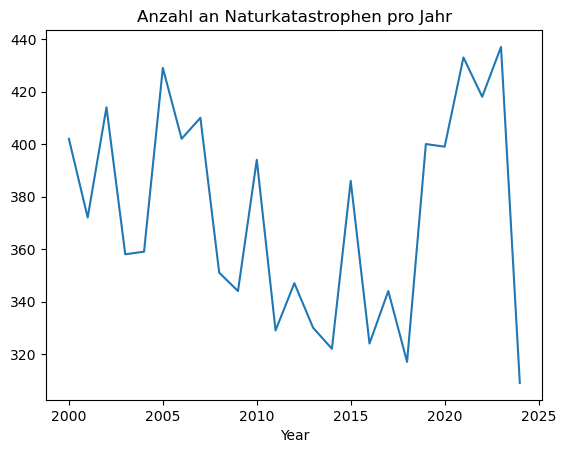

In [60]:
analyze(data, 'world')